<a href="https://colab.research.google.com/github/karanSingh10/Business-Analytics/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/rcmalli/keras-VGGFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-VGGFace to /tmp/pip-req-build-7uhkc8sd
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-VGGFace /tmp/pip-req-build-7uhkc8sd
  Resolved https://github.com/rcmalli/keras-VGGFace to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 


Detect Faces for face recognition

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import keras 
import keras_vggface
from keras_vggface.vggface import VGGFace
from mtcnn.mtcnn import MTCNN
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from keras.utils.data_utils import get_file
import keras_vggface.utils
from PIL import Image
import os
import os.path

##Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/input"

In [ ]:
#changing the working directory
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"
#Check the present working directory using pwd command

/content/gdrive/MyDrive/Colab Notebooks/input


In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/input


In [ ]:
!kaggle datasets download -d maciejgronczynski/biggest-genderface-recognition-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls 

faces  kaggle.json


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: faces/woman/woman_5038.jpg  
  inflating: faces/woman/woman_5039.jpg  
  inflating: faces/woman/woman_504.jpg  
  inflating: faces/woman/woman_5040.jpg  
  inflating: faces/woman/woman_5041.jpg  
  inflating: faces/woman/woman_5042.jpg  
  inflating: faces/woman/woman_5043.jpg  
  inflating: faces/woman/woman_5044.jpg  
  inflating: faces/woman/woman_5045.jpg  
  inflating: faces/woman/woman_5046.jpg  
  inflating: faces/woman/woman_5047.jpg  
  inflating: faces/woman/woman_5048.jpg  
  inflating: faces/woman/woman_5049.jpg  
  inflating: faces/woman/woman_505.jpg  
  inflating: faces/woman/woman_5050.jpg  
  inflating: faces/woman/woman_5051.jpg  
  inflating: faces/woman/woman_5052.jpg  
  inflating: faces/woman/woman_5053.jpg  
  inflating: faces/woman/woman_5054.jpg  
  inflating: faces/woman/woman_5055.jpg  
  inflating: faces/woman/woman_5056.jpg  
  inflating: faces/woman/woman_5057.jpg  
  inflating: faces/woman/wo

In [ ]:
!ls 

faces  kaggle.json


In [ ]:
#Read images here

In [ ]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [ ]:
#Shuffle will randomly shuffle images
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "faces",
    seed=123,
    validation_split=0.1,
  subset="validation",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 27167 files belonging to 2 classes.
Using 2716 files for validation.


In [ ]:
class_names = dataset.class_names
class_names

['man', 'woman']

In [ ]:
#272 because every element in a dataset is a batch of 100 images
len(dataset)

91

In [ ]:
272*100

27200

In [ ]:
#Eevry tensor needs to be converted to a numpy array and we have 100 batch size and images of 256*256 with 3 channels
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(30, 256, 256, 3)
[0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0]


In [ ]:
#First Image
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.numpy())

[[[[111.         126.         167.        ]
   [120.64844    137.57812    180.50781   ]
   [127.58984    149.29688    196.0625    ]
   ...
   [203.0586     193.23438    191.        ]
   [203.92969    197.         191.        ]
   [202.         197.         191.        ]]

  [[120.64844    135.64844    174.71875   ]
   [126.57318    144.43379    184.50287   ]
   [127.92905    150.60092    194.47202   ]
   ...
   [203.9669     194.14268    191.90831   ]
   [203.92969    197.         191.        ]
   [202.         197.         191.        ]]

  [[131.35547    149.17969    185.35547   ]
   [132.60298    152.41342    189.55405   ]
   [127.38612    150.20348    192.03113   ]
   ...
   [206.7139     195.83795    193.82422   ]
   [204.90419    195.15028    192.88281   ]
   [203.88281    196.0586     192.88281   ]]

  ...

  [[ 33.058594    31.058594    34.058594  ]
   [ 33.058594    31.058594    34.058594  ]
   [ 33.003433    31.003433    34.003433  ]
   ...
   [ 12.          12.          12. 

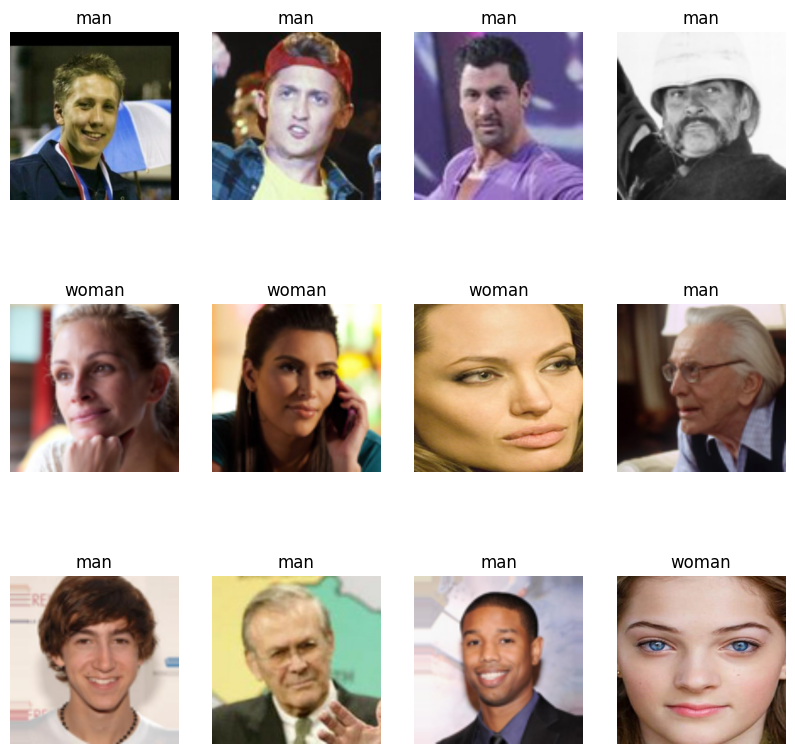

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

91

##Let's split dataset into train, val, test

In [ ]:
train_size = 0.8
len_1 = int(len(dataset)*train_size)

In [ ]:
train_ds = dataset.take(len_1)
len(train_ds)

72

In [ ]:
test_ds = dataset.skip(len_1)
len(test_ds)

19

In [ ]:
val_size=0.1
len_2 = int(len(dataset)*val_size)

In [ ]:
val_ds = test_ds.take(len_2)
len(val_ds)

9

In [ ]:
test_ds = test_ds.skip(len_2)
len(test_ds)

10

In [ ]:
#Function for doing all thinghs above
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

72

In [ ]:
len(val_ds)

9

In [ ]:
len(test_ds)

10

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
j = 0
for image in train_ds:
    j = j + 1
    image[i]
    if j == 1:
      break

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

#Data Augmentation

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(224, 224),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),

  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

Next, we can create an MTCNN face detector class and use it to detect all faces in the loaded photograph.

##Trying to extract face out of image

In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/input/faces/man"

/content/gdrive/MyDrive/Colab Notebooks/input/faces/man


In [ ]:
# create the detector, using default weights
detector = MTCNN()
plt.figure(figsize=(10, 10))
pixels = plt.imread("man_10408.jpg")
# detect faces in the image
results = detector.detect_faces(image_batch[i].numpy().astype("uint8"))

1/1 [==============================] - 0s 200ms/step


<Figure size 1000x1000 with 0 Axes>

In [ ]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 297ms/step


The result is a list of bounding boxes, where each bounding box defines a lower-left-corner of the bounding box, as well as the width and height.

If we assume there is only one face in the photo for our experiments, we can determine the pixel coordinates of the bounding box as follows.

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [ ]:
#We can use these coordinates to extract the face.
# extract the face
face = pixels[y1:y2, x1:x2]

In [ ]:
#We can then use the PIL library to resize this small image of the face to the required size; specifically, the model expects square input faces with the shape 224×224.
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((224, 224))
face_array = asarray(image)

Tying all of this together, the function extract_face() will load a photograph from the loaded filename and return the extracted face.

It assumes that the photo contains one face and will return the first face detected.



1/1 [==============================] - 0s 175ms/step


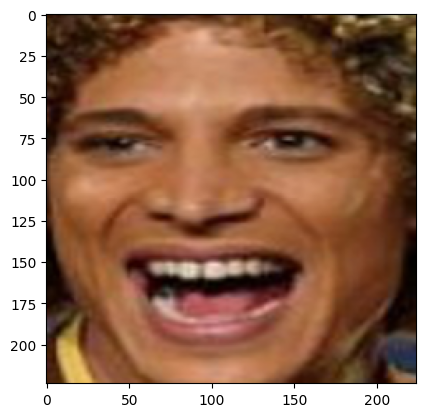

In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
required_size=(224, 224)
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = plt.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array
 
# load the photo and extract the face
pixels = extract_face('man_10466.jpg')
# plot the extracted face
plt.imshow(pixels)
# show the plot
plt.show()

In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"

/content/gdrive/MyDrive/Colab Notebooks/input


##Face identification using VGGFace2

Before we can make a prediction with a face, the pixel values must be scaled in the same way that data was prepared when the VGGFace model was fit. Specifically, the pixel values must be centered on each channel using the mean from the training dataset.

This can be achieved using the preprocess_input() function provided in the keras-vggface library and specifying the ‘version=2‘ so that the images are scaled using the mean values used to train the VGGFace2 models instead of the VGGFace1 models (the default).

In [ ]:
from numpy import expand_dims
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

##Model building

#RESNET50

In [ ]:
vggface_resnet = VGGFace(model='resnet50', include_top=False, input_shape=(256,256,3))
print(vggface_resnet.summary())

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 128, 128, 64  9408        ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 128, 128, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

In [ ]:
outputclass = 2

In [ ]:
from keras.layers import Flatten, Dense, Input
#Build the mew model
inputs = tf.keras.Input(shape=(256,256,3))
x = data_augmentation(inputs)
x = vggface_resnet(x)
x = Flatten(name='flatten')(x)
out = Dense (outputclass, name = 'classifer')(x)

vgg_new_model = keras.Model(inputs, out)

In [ ]:
#Freeze base model
vggface_resnet.trainable = False
last_layer = vggface_resnet.get_layer('avg_pool').output

In [ ]:
vgg_new_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 vggface_resnet50 (Functiona  (None, 1, 1, 2048)       23561152  
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 classifer (Dense)           (None, 2)                 4098      
                                                                 
Total params: 23,565,250
Trainable params: 4,098
Non-trainable params: 23,561,152
___________________________________________

#ALEXNET

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
model= tf.keras.Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation= 'relu', input_shape= (256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 31, 31, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model= tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(filters=20, kernel_size=(11,11), strides=(4,4), activation= 'relu', input_shape= input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Conv2D(filters=40, kernel_size=(6,6), strides=(3,3), activation= 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Conv2D(filters=50, kernel_size=(3,3), strides=(2,2), activation= 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    Flatten(),
    Dense(300, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
    ])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (30, 224, 224, 3)         0         
                                                                 
 conv2d_87 (Conv2D)          (30, 54, 54, 20)          7280      
                                                                 
 batch_normalization_3 (Batc  (30, 54, 54, 20)         80        
 hNormalization)                                                 
                                                                 
 max_pooling2d_46 (MaxPoolin  (30, 27, 27, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (30, 8, 8, 40)           

In [ ]:
#base_learning_rate = 0.001
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    )

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
72/72 [==============================] - 49s 630ms/step - loss: 0.6907 - accuracy: 0.6188 - val_loss: 0.7860 - val_accuracy: 0.3741
Epoch 2/10
72/72 [==============================] - 47s 649ms/step - loss: 0.6194 - accuracy: 0.6645 - val_loss: 0.6069 - val_accuracy: 0.6815
Epoch 3/10
72/72 [==============================] - 48s 656ms/step - loss: 0.6218 - accuracy: 0.6692 - val_loss: 0.5660 - val_accuracy: 0.7370
Epoch 4/10
72/72 [==============================] - 46s 643ms/step - loss: 0.5800 - accuracy: 0.7134 - val_loss: 0.5648 - val_accuracy: 0.6926
Epoch 5/10
72/72 [==============================] - 43s 596ms/step - loss: 0.5639 - accuracy: 0.7125 - val_loss: 0.8309 - val_accuracy: 0.4630
Epoch 6/10
72/72 [==============================] - 43s 597ms/step - loss: 0.5609 - accuracy: 0.7134 - val_loss: 0.5300 - val_accuracy: 0.7481
Epoch 7/10
72/72 [==============================] - 40s 551ms/step - loss: 0.5442 - accuracy: 0.7265 - val_loss: 0.5446 - val_accuracy: 0.7481

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


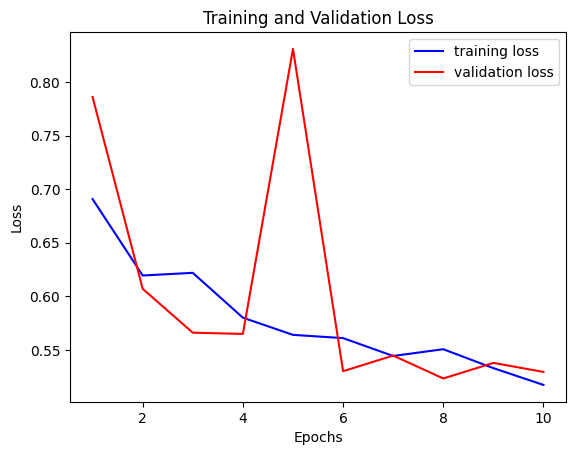

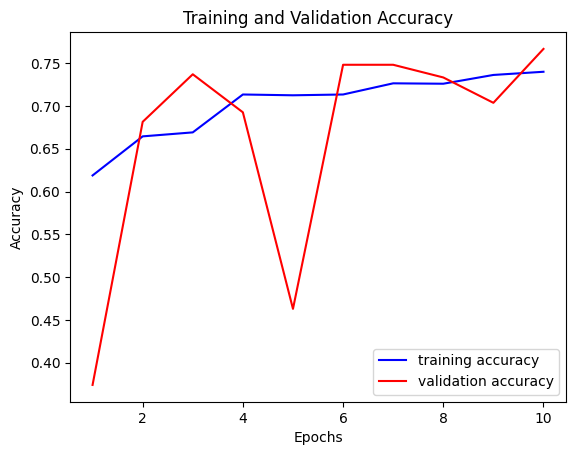

In [ ]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.99
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

10/10 - 1s - loss: 0.5005 - accuracy: 0.7333 - 920ms/epoch - 92ms/step

test set loss:  0.5005 
test set accuracy:  0.7333


In [ ]:
!ls

faces  kaggle.json


In [ ]:

# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
 # load image from file
 pixels = pyplot.imread(filename)
 # create the detector, using default weights
 detector = MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = asarray(image)
 return face_array
 
# load the photo and extract the face
pixels = extract_face('man_10466.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
 print('%s: %.3f%%' % (result[0], result[1]*100))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-4007c4c98b77>", line 31, in <cell line: 31>
    pixels = extract_face('man_10466.jpg')
  File "<ipython-input-72-4007c4c98b77>", line 14, in extract_face
    pixels = pyplot.imread(filename)
  File "/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py", line 2195, in imread
    return matplotlib.image.imread(fname, format)
  File "/usr/local/lib/python3.9/dist-packages/matplotlib/image.py", line 1563, in imread
    with img_open(fname) as image:
  File "/usr/local/lib/python3.9/dist-packages/PIL/Image.py", line 2975, in open
    fp = builtins.open(filename, "rb")
OSError: [Errno 107] Transport endpoint is not connected: 'man_10466.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/p